## Calculating Zonal Statistics of Raster Using Python 3

In [1]:
from matplotlib import pyplot as plt
from rasterio.plot import show_hist
from rasterio.plot import show #To plot raster alone
import geopandas as gpd
import pandas as pd
import rasterstats
import rasterio

## Read the Districts shapefile and Rainfall Tifs from Local Disks

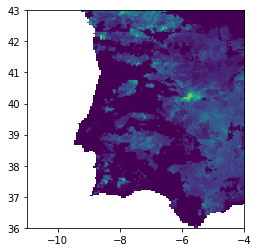

<AxesSubplot:>

In [15]:
# Read the districts shapefile 
districts = gpd.read_file(r'./Districts/districts.shp')

# Read the rainfall raster of 2020-04-15
rainFall = rasterio.open(r'./Rainfall Data Rasters/2020-4-15.tif', mode = 'r')
show(rainFall) #This is to plot and show a single Raster as opened above

## Plotting the raster and the districts shapefile together 

In [18]:
"""
Creates a plotting axis and then plots on them
Facecolor(Fill color) = 'None' when ploting .shps to only display bounds
set edge color to sth distinct e.g 'Yellow'
"""
def makePlot():
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))
    show(rainFall, ax = ax1, title = 'Rainfall')
    districts.plot(ax = ax1, facecolor = 'None', edgecolor = 'yellow')
    show_hist(rainFall, title = 'Histogram', ax = ax2)
    plt.show()
    
    # Assign raster values to a numpy nd array
rainfall_array = rainFall.read(1)
affine = rainFall.transform

In [19]:
type(rainfall_array)

numpy.ndarray

## View the Raster Properties/Metadata

In [29]:
rfMeta = rainFall.meta
coordS = rf.crs

## Calculating the zonal statistics function using the rasterstats library

In [56]:
"""Calculating the zonal statistics """
def calcZonalStats():
    avg_rainFall = rasterstats.zonal_stats(
        districts, rainfall_array, affine = affine,
                                    stats="count min mean max median",
                                    geojson_out = True)

    # Extracting the average rainfall data from the list
    avg_rainfall = []
    i = 0
    while i < len(avg_rainFall):
        avg_rainfall.append(avg_rainFall[i]['properties'])
        i = i + 1 

    # Transfering the infromation from the list to a pandas DataFrame
    avg_rf_portugal = pd.DataFrame(avg_rainfall)
    print(avg_rf_portugal)
    
    avg_rf_portugal.plot(x = 'NAME_1', y = ['mean','median','min','max'], kind = 'line')    

### Calling The Plot and Calculate Functions

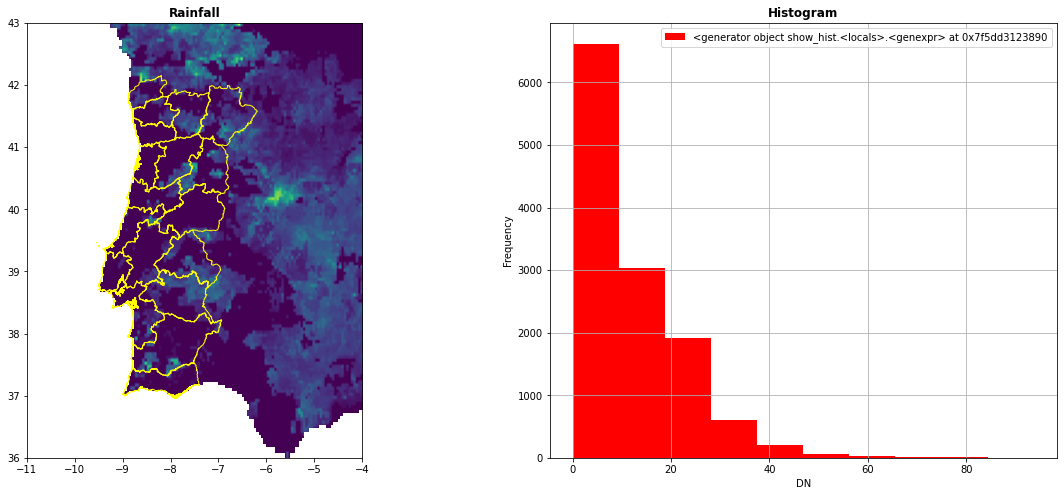

/home/jacob/.local/lib/python3.8/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


              NAME_1  min        max       mean  count     median
0              Évora  0.0  37.059479  10.884028    314  10.692919
1             Aveiro  0.0   0.000000   0.000000    119   0.000000
2               Beja  0.0  73.437820   5.332767    414   0.000000
3              Braga  0.0  28.790232   4.867859    120   0.000000
4           Bragança  0.0  55.288837  11.206017    282  10.217235
5     Castelo Branco  0.0  37.812283   1.272397    285   0.000000
6            Coimbra  0.0  38.559547   3.267679    168   0.000000
7               Faro  0.0  35.218182   2.097385    206   0.000000
8             Guarda  0.0  63.245892   9.654525    235   0.000000
9             Leiria  0.0  46.084324   2.643043    146   0.000000
10            Lisboa  0.0  12.284949   0.581933    111   0.000000
11        Portalegre  0.0  40.538353   9.791677    254   8.045182
12             Porto  0.0   0.000000   0.000000     98   0.000000
13          Santarém  0.0  31.663044   2.660926    281   0.000000
14        

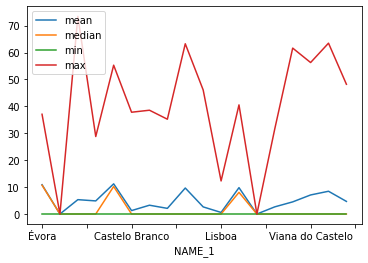

In [57]:
makePlot()
calcZonalStats()